In [25]:
%matplotlib inline

In [26]:
# Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Set path for csv file
csvpath = os.path.join("Resources", "ACCIDENT.csv")
print(csvpath)

Resources\ACCIDENT.csv


In [28]:
# Import the ACCIDENT.csv file as a DataFrame
time_df = pd.read_csv("../Project1/Resources/ACCIDENT.csv")
time_df.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,MANCOL_IM,RELJCT1_IM,RELJCT2_IM,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,PSUSTRAT,WEIGHT
0,201800381338,4,56,208,208,1,9,4,4,0,...,1,0,1,1,1,0,0,2,20,187.193308
1,201800381366,4,56,214,214,1,7,3,3,0,...,1,0,1,1,1,1,1,2,20,149.787336
2,201800381374,4,56,214,214,1,6,2,2,0,...,7,0,1,2,1,1,2,2,20,76.421258
3,201800383118,4,56,209,209,1,10,2,2,0,...,6,0,2,1,10,1,1,2,20,265.232273
4,201800383942,4,64,306,64,1,6,2,2,0,...,7,0,1,1,10,1,1,2,23,78.134540


In [29]:
# Access number of null values in dataframe
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CASENUM     48443 non-null  int64  
 1   REGION      48443 non-null  int64  
 2   PSU         48443 non-null  int64  
 3   PJ          48443 non-null  int64  
 4   PSU_VAR     48443 non-null  int64  
 5   URBANICITY  48443 non-null  int64  
 6   STRATUM     48443 non-null  int64  
 7   VE_TOTAL    48443 non-null  int64  
 8   VE_FORMS    48443 non-null  int64  
 9   PVH_INVL    48443 non-null  int64  
 10  PEDS        48443 non-null  int64  
 11  PERMVIT     48443 non-null  int64  
 12  PERNOTMVIT  48443 non-null  int64  
 13  NUM_INJ     48443 non-null  int64  
 14  MONTH       48443 non-null  int64  
 15  YEAR        48443 non-null  int64  
 16  DAY_WEEK    48443 non-null  int64  
 17  HOUR        48443 non-null  int64  
 18  MINUTE      48443 non-null  int64  
 19  HARM_EV     48443 non-nul

In [30]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
reduced_df = time_df[["CASENUM", "URBANICITY", "NUM_INJ", "MONTH", "YEAR", "DAY_WEEK",
                       "HOUR", "WKDY_IM", "HOUR_IM"]]
reduced_df

,CASENUM,URBANICITY,NUM_INJ,MONTH,YEAR,DAY_WEEK,HOUR,WKDY_IM,HOUR_IM
0,201800381338,1,0,1,2018,4,8,4,8
1,201800381366,1,1,1,2018,3,14,3,14
2,201800381374,1,2,1,2018,4,17,4,17
3,201800383118,1,0,1,2018,4,11,4,11
4,201800383942,1,1,1,2018,2,16,2,16
...,...,...,...,...,...,...,...,...,...
48438,201801402590,1,0,12,2018,2,8,2,8
48439,201801402620,1,2,12,2018,5,15,5,15
48440,201801402628,1,2,12,2018,7,17,7,17
48441,201801402629,1,2,12,2018,6,17,6,17


In [31]:
reduced_df['NUM_INJ'] = reduced_df['NUM_INJ'].replace({0:'No Person Injured', 1:'One Person Injured', 
                                                        2:'Two People Injured', 3:'Three People Injured',
                                                        4:'Four People Injured', 5:'Five People Injured',
                                                        6:'Six People Injured', 7:'Seven People Injured',
                                                        8:'Eight People Injured', 9:'Nine People Injured',
                                                        10:'Ten People Injured', 11:'Eleven People Injured',
                                                        12:'Twelve People Injured', 17:'Seventeen People Injured',
                                                        98: 'No Person Involved in the Crash', 
                                                        99: 'All Persons in Crash are Unknown if Injured'})

reduced_df['NUM_INJ']

<ipython-input-31-5bf54dd5e22e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['NUM_INJ'] = reduced_df['NUM_INJ'].replace({0:'No Person Injured', 1:'One Person Injured',


0                                  No Person Injured
1                                 One Person Injured
2                                 Two People Injured
3                                  No Person Injured
4                                 One Person Injured
                            ...                     
48438                              No Person Injured
48439                             Two People Injured
48440                             Two People Injured
48441                             Two People Injured
48442    All Persons in Crash are Unknown if Injured
Name: NUM_INJ, Length: 48443, dtype: object

In [33]:
reduced_df['URBANICITY'] = reduced_df['URBANICITY'].replace({1:'Urban', 2:'Rural'})
reduced_df['URBANICITY']

<ipython-input-33-d4430200f8a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['URBANICITY'] = reduced_df['URBANICITY'].replace({1:'Urban', 2:'Rural'})


0        Urban
1        Urban
2        Urban
3        Urban
4        Urban
         ...  
48438    Urban
48439    Urban
48440    Urban
48441    Urban
48442    Urban
Name: URBANICITY, Length: 48443, dtype: object

In [34]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CASENUM     48443 non-null  int64 
 1   URBANICITY  48443 non-null  object
 2   NUM_INJ     48443 non-null  object
 3   MONTH       48443 non-null  int64 
 4   YEAR        48443 non-null  int64 
 5   DAY_WEEK    48443 non-null  int64 
 6   HOUR        48443 non-null  int64 
 7   WKDY_IM     48443 non-null  int64 
 8   HOUR_IM     48443 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [35]:
reduced_df.describe()

,CASENUM,MONTH,YEAR,DAY_WEEK,HOUR,WKDY_IM,HOUR_IM
count,4.844300e+04,48443.000000,48443.0,48443.000000,48443.000000,48443.000000,48443.000000
mean,2.018009e+11,6.632764,2018.0,4.116859,13.707718,4.116859,13.302087
std,2.381253e+05,3.447666,0.0,1.903722,7.965483,1.903722,5.392093
min,2.018004e+11,1.000000,2018.0,1.000000,0.000000,1.000000,0.000000
25%,2.018007e+11,4.000000,2018.0,2.000000,9.000000,2.000000,9.000000
50%,2.018009e+11,7.000000,2018.0,4.000000,14.000000,4.000000,14.000000
75%,2.018011e+11,10.000000,2018.0,6.000000,17.000000,6.000000,17.000000
max,2.018014e+11,12.000000,2018.0,7.000000,99.000000,7.000000,23.000000


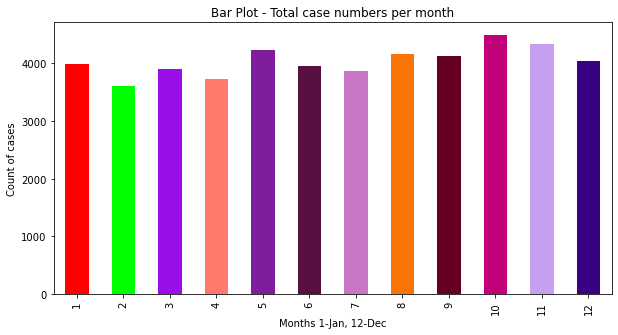

<Figure size 432x288 with 0 Axes>

In [46]:
# Generate a bar plot showing the total case numbers per month using Pandas
month = reduced_df.groupby(['MONTH']).count()['CASENUM']

my_colors = ["#FF0000", "#00FF00", "#9A0EEA", "#FF796C", "#7E1E9C", "#580F41", "#C875C4", "#F97306", "#650021", "#C20078", "#C79FEF", "#380282"]

month.plot(kind="bar", figsize=(10,5), color=my_colors)

plt.title("Bar Plot - Total case numbers per month")
plt.xlabel("Months 1-Jan, 12-Dec")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()

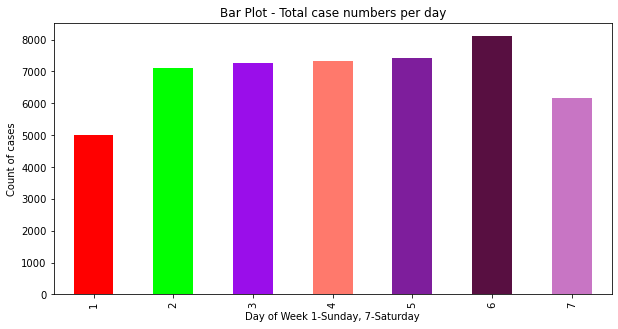

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a bar plot showing the total case numbers per month using Pandas
day = reduced_df.groupby(['DAY_WEEK']).count()['CASENUM']

day.plot(kind="bar", figsize=(10,5), color=my_colors)

plt.title("Bar Plot - Total case numbers per day")
plt.xlabel("Day of Week 1-Sunday, 7-Saturday")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()

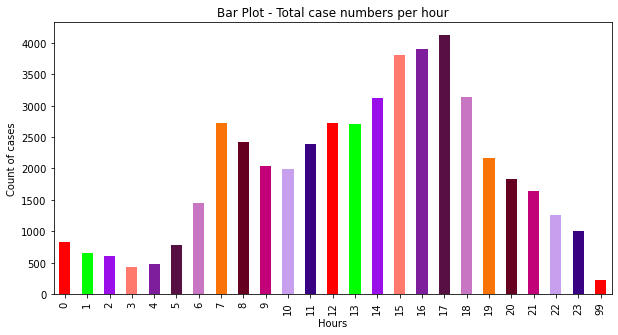

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate a bar plot showing the total case numbers per month using Pandas
hour = reduced_df.groupby(['HOUR']).count()['CASENUM']

hour.plot.bar(figsize=(10,5), color=my_colors)

plt.title("Bar Plot - Total case numbers per hour")
plt.xlabel("Hours")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()

In [49]:
num_inj = reduced_df.groupby(["NUM_INJ"]).count()['CASENUM']
num_inj

NUM_INJ
All Persons in Crash are Unknown if Injured      738
Eight People Injured                              16
Eleven People Injured                              2
Five People Injured                              192
Four People Injured                              497
Nine People Injured                               10
No Person Injured                              24356
No Person Involved in the Crash                   17
One Person Injured                             16508
Seven People Injured                              45
Seventeen People Injured                           1
Six People Injured                                93
Ten People Injured                                 2
Three People Injured                            1393
Twelve People Injured                              2
Two People Injured                              4571
Name: CASENUM, dtype: int64

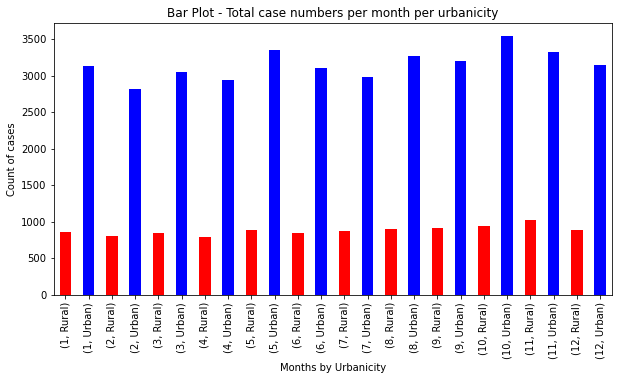

<Figure size 432x288 with 0 Axes>

In [50]:
counts_month = reduced_df.groupby(['MONTH', "URBANICITY"]).count()["CASENUM"]

my_color = ["#FF0000", "#0000FF"]
counts_month.plot.bar(figsize=(10,5), color=my_color)

plt.title("Bar Plot - Total case numbers per month per urbanicity")
plt.xlabel("Months by Urbanicity")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()

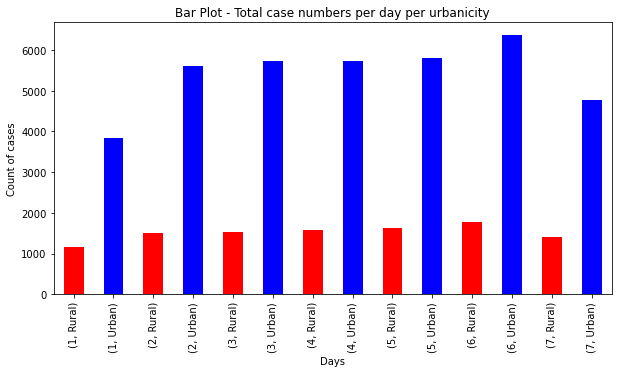

<Figure size 432x288 with 0 Axes>

In [44]:
counts_day = reduced_df.groupby(['DAY_WEEK', "URBANICITY"]).count()["CASENUM"]

counts_day.plot.bar(figsize=(10,5), color=my_color)

plt.title("Bar Plot - Total case numbers per day per urbanicity")
plt.xlabel("Days")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()

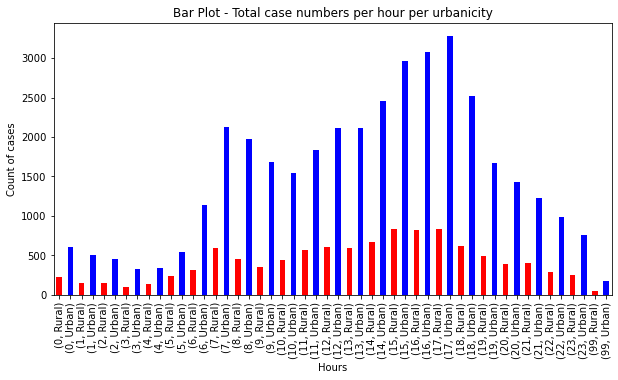

<Figure size 432x288 with 0 Axes>

In [45]:
counts_hour = reduced_df.groupby(['HOUR', "URBANICITY"]).count()["CASENUM"]

counts_hour.plot.bar(figsize=(10,5), color=my_color)

plt.title("Bar Plot - Total case numbers per hour per urbanicity")
plt.xlabel("Hours")
plt.ylabel("Count of cases")

plt.show()
plt.tight_layout()